In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
# create a dataframe to store results
mf_rbf_gpr_results = pd.DataFrame()
# use a for loop to read all csv files

input = pd.read_csv("exp_mf_rbf_gpr_input.csv", index_col=0)
output = pd.read_csv("exp_mf_rbf_gpr_output.csv", index_col=0)
# merge input and output dataframes
df = pd.merge(input, output, left_index=True, right_index=True)
mf_rbf_gpr_results = pd.concat([mf_rbf_gpr_results, df])

# remove the results of problem "mf_Himmelblau"
mf_rbf_gpr_results = mf_rbf_gpr_results[
    mf_rbf_gpr_results["problem"] != "mf_Himmelblau"
]

In [3]:
# select the cases where the num_hf <=30 to have a new data_frame
mf_rbf_gpr_results = mf_rbf_gpr_results[mf_rbf_gpr_results["num_hf"] <= 30]

In [4]:
mf_rbf_gpr_results

,noise_std,num_hf,num_lf,problem,seed,progress,mf_normalized_mae,mf_normalized_rmse,mf_r2,mf_mean_log_likelihood,mf_learned_noise_std,mf_cpu_time,sf_normalized_mae,sf_normalized_rmse,sf_r2,sf_mean_log_likelihood,sf_learned_noise_std,sf_cpu_time
0,0.1,5,200,mf_Bohachevsky,10,finished,0.567221,0.079117,0.985024,-2.335256,0.000137,11.064538,1.345509,0.324103,0.748678,-3.296372,2.605681,0.925423
1,0.3,5,200,mf_Bohachevsky,10,finished,0.577352,0.081948,0.983933,-5.175212,0.000137,10.082811,1.331596,0.328000,0.742598,-3.330144,2.675635,0.846174
2,0.5,5,200,mf_Bohachevsky,10,finished,0.640835,0.095627,0.978121,-13.916887,0.000135,11.065404,1.142052,0.409614,0.598566,-3.833617,6.665658,0.833135
3,0.1,10,200,mf_Bohachevsky,10,finished,0.371362,0.039485,0.996270,-1.082158,0.534950,15.870624,0.617055,0.077312,0.985699,-1.566813,0.428992,1.329988
4,0.3,10,200,mf_Bohachevsky,10,finished,0.265560,0.044104,0.995346,-1.707847,0.278583,11.450701,0.654877,0.086430,0.982127,-5.961306,0.000168,1.175469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,0.3,25,200,mf_Sixhump,100,finished,1.147018,0.127257,0.991436,-1.452347,0.622099,15.775308,0.396599,0.096801,0.995045,-1.233962,0.529261,3.093668
2984,0.5,25,200,mf_Sixhump,100,finished,0.539391,0.060302,0.998077,-1.092726,0.481006,9.604630,0.426873,0.106430,0.994010,-1.403606,0.602275,2.318283
2985,0.1,30,200,mf_Sixhump,100,finished,0.224253,0.024497,0.999683,0.129792,0.133561,16.403279,0.536249,0.089977,0.995719,-1.147548,0.631640,3.273757
2986,0.3,30,200,mf_Sixhump,100,finished,0.492268,0.053787,0.998470,-0.617690,0.350108,16.260402,0.604134,0.095448,0.995182,-1.248887,0.679143,2.419528


Text(0.5, 1.0, 'Log Likelihood')

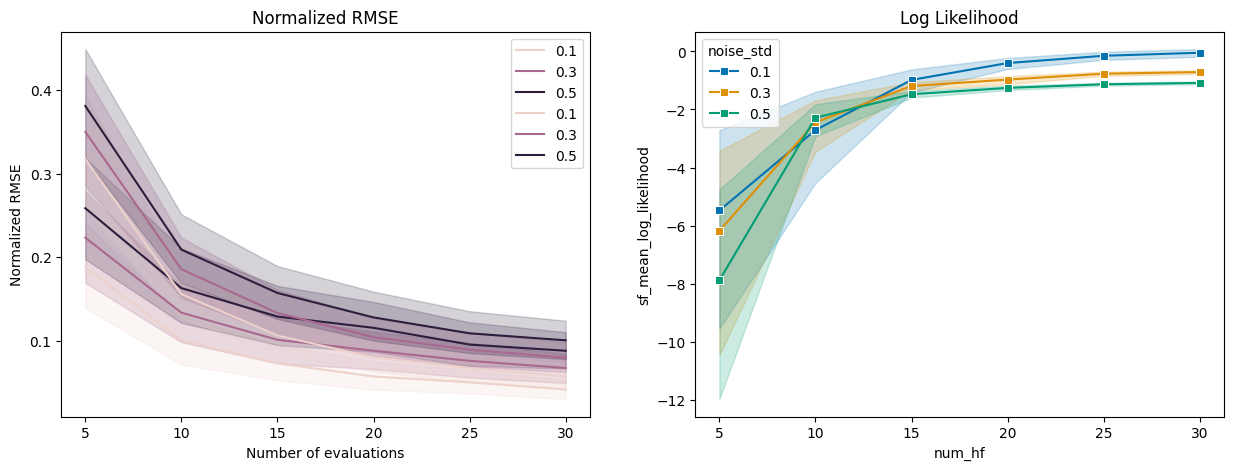

In [5]:
# plot the results of the mf_rbf_lf_200 and gpr_rbf_booth experiments using number of evaluations as x and normalized rmse and log likelihood as y
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    y="mf_normalized_rmse",
    hue="noise_std",
    ax=ax[0],
)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    y="sf_normalized_rmse",
    hue="noise_std",
    ax=ax[0],
)
ax[0].set_title("Normalized RMSE")
ax[0].set_xlabel("Number of evaluations")
ax[0].set_ylabel("Normalized RMSE")
ax[0].legend()
# sns.lineplot(data=mf_rbf_gpr_results, x="num_hf", y="mf_mean_log_likelihood", hue="noise_std", palette='colorblind', marker='^', legend='full',
#              ax=ax[1])
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    y="sf_mean_log_likelihood",
    hue="noise_std",
    palette="colorblind",
    marker="s",
    legend="full",
    ax=ax[1],
)
ax[1].set_title("Log Likelihood")

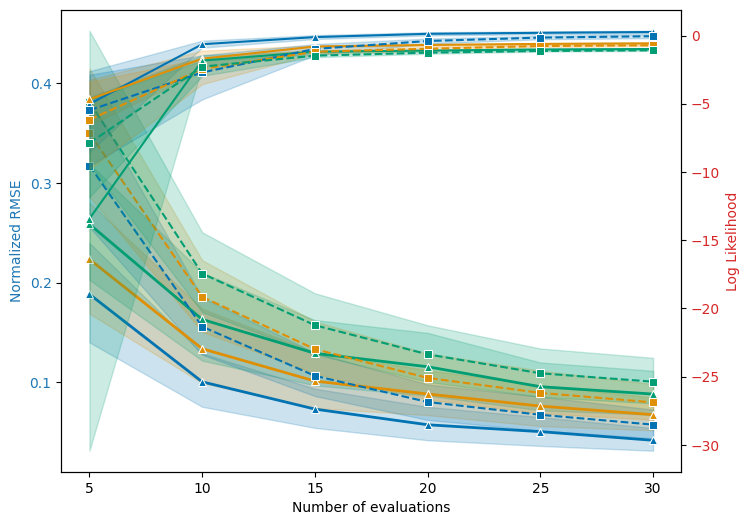

In [6]:
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot normalized RMSE on the left y-axis
color = "tab:blue"
ax1.set_xlabel("Number of evaluations")
ax1.set_ylabel("Normalized RMSE", color=color)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    palette="colorblind",
    marker="^",
    legend="full",
    linewidth=2,
    y="mf_normalized_rmse",
    hue="noise_std",
    ax=ax1,
)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    hue="noise_std",
    palette="colorblind",
    marker="s",
    legend="full",
    linestyle="dashed",
    y="sf_normalized_rmse",
    ax=ax1,
)
ax1.tick_params(axis="y", labelcolor=color)

ax1.get_legend().remove()

# Create another y-axis for log likelihood
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Log Likelihood", color=color)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    hue="noise_std",
    palette="colorblind",
    marker="^",
    legend="full",
    y="mf_mean_log_likelihood",
    ax=ax2,
)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    hue="noise_std",
    palette="colorblind",
    marker="s",
    legend="full",
    linestyle="dashed",
    y="sf_mean_log_likelihood",
    ax=ax2,
)
ax2.tick_params(axis="y", labelcolor=color)
ax2.get_legend().remove()
# set the legend scale of the right y-axis into log scale
# ax2.set_yscale('log')

# add legend

plt.show()

In [7]:
# problem information
problem_sets = [
    "Bohachevsky",
    "Booth",
    "Borehole",
    "CurrinExp",
    "Hartman3",
    "Hartman6",
    "Park91A",
    "Park91B",
    "Sixhump",
]
dimensions = [2, 2, 8, 2, 3, 6, 4, 4, 2]
r2 = [0.857, 0.925, 1.000, 0.997, -0.196, 0.712, 0.994, 1.0000, 0.833]

# # set r2 to have 3 decimal places
# r2 = [round(i, 3) for i in r2]
# print(r2)

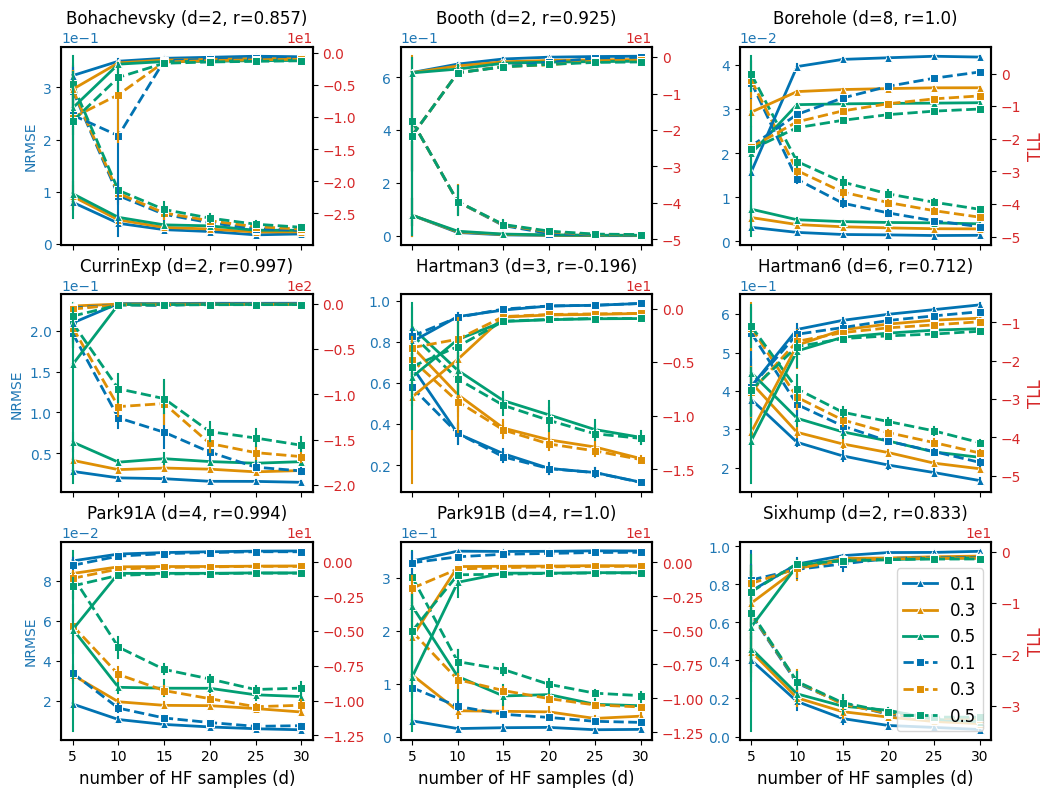

In [19]:
problem_set = mf_rbf_gpr_results["problem"].unique()

font_size = 12
fig, ax = plt.subplots(3, 3, figsize=(12, 9))
# for problem in problem_set:

for ii in range(3):
    for jj in range(3):
        problem = problem_set[ii * 3 + jj]
        result = mf_rbf_gpr_results[(mf_rbf_gpr_results["problem"] == problem)]
        # Plot normalized RMSE on the left y-axis
        color = "tab:blue"
        if ii == 2:
            ax[ii, jj].set_xlabel(
                "number of HF samples (d)", fontsize=font_size)
        else:
            ax[ii, jj].set_xlabel(" ")
        if jj == 0:
            ax[ii, jj].set_ylabel("NRMSE", color=color)
        else:
            ax[ii, jj].set_ylabel(" ", color=color)
        sns.lineplot(
            data=result,
            x="num_hf",
            palette="colorblind",
            marker="^",
            legend="full",
            linewidth=2,
            y="mf_normalized_rmse",
            hue="noise_std",
            ax=ax[ii, jj],
            err_style="bars",
        )
        sns.lineplot(
            data=result,
            x="num_hf",
            hue="noise_std",
            palette="colorblind",
            marker="s",
            legend="full",
            linewidth=2,
            linestyle="dashed",
            y="sf_normalized_rmse",
            ax=ax[ii, jj],
            err_style="bars",
        )
        ax[ii, jj].tick_params(axis="y", labelcolor=color)
        ax[ii, jj].get_legend().remove()
        # Create another y-axis for log likelihood
        ax2 = ax[ii, jj].twinx()
        color = "tab:red"
        if jj == 2:
            ax2.set_ylabel("TLL", color=color, fontsize=font_size)
        else:
            ax2.set_ylabel(" ", color=color)
        sns.lineplot(
            data=result,
            x="num_hf",
            hue="noise_std",
            palette="colorblind",
            marker="^",
            legend="full",
            linewidth=2,
            y="mf_mean_log_likelihood",
            err_style="bars",
            ax=ax2,
        )
        sns.lineplot(
            data=result,
            x="num_hf",
            hue="noise_std",
            palette="colorblind",
            marker="s",
            legend="full",
            linestyle="dashed",
            linewidth=2,
            err_style="bars",
            y="sf_mean_log_likelihood",
            ax=ax2,
        )
        ax2.tick_params(axis="y", labelcolor=color)
        # remove the legend of ax2
        if ii == 2 and jj == 2:
            ax2.legend(fontsize=12)
        else:
            ax2.get_legend().remove()

        # set the font of axis and y-axis precision
        ax[ii, jj].tick_params(axis="both", which="major", labelsize=10)
        ax2.tick_params(axis="both", which="major", labelsize=10)
        # set the line width of the axis
        for axis in ["top", "bottom", "left", "right"]:
            ax[ii, jj].spines[axis].set_linewidth(1.5)
        ax2.spines["right"].set_linewidth(1.5)
        ax2.ticklabel_format(
            axis="y", style="scientific", scilimits=(0, 0))
        # get title info
        title = (
            problem_sets[ii * 3 + jj]
            + " (d="
            + str(dimensions[ii * 3 + jj])
            + ", r="
            + str(r2[ii * 3 + jj])
            + ")"
        )
        ax[ii, jj].set_title(title)
        ax[ii, jj].tick_params(axis="y")
        ax[ii, jj].ticklabel_format(
            axis="y", style="scientific", scilimits=(0, 0))

plt.subplots_adjust(wspace=0.35, hspace=0.25)

for i in range(2):
    for j in range(3):
        # remove x tick label
        ax[i, j].set_xticklabels([])


plt.savefig("gpr_comparison_at_200lf_samples.png",
            dpi=300, bbox_inches="tight")
plt.savefig("gpr_comparison_at_200lf_samples.pdf",
            dpi=300, bbox_inches="tight")
plt.savefig("gpr_comparison_at_200lf_samples.svg",
            dpi=300, bbox_inches="tight")
plt.show()